In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def read_csv_to_numpy(csv_file_path):
    df = pd.read_csv(csv_file_path)
    flattened = df.values.flatten()
    return flattened

def convert_folder_to_numpy(folder_path):
    numpy_arrays = {}
    for filename in os.listdir(folder_path):
        if filename.endswith("cm.csv"):
            file_path = os.path.join(folder_path, filename)
            array_name = os.path.splitext(filename)[0]
            numpy_array = read_csv_to_numpy(file_path)
            numpy_arrays[array_name] = numpy_array
    return numpy_arrays

# Replace 'your_folder_path' with the path to the folder containing CSV files
folder_path = 'model_results'

# Call the function to convert all CSV files in the folder to NumPy arrays
numpy_arrays = convert_folder_to_numpy(folder_path)

In [14]:
numpy_arrays

{'Adaboost_cm': array([23002,  1741,  1599, 18626], dtype=int64),
 'Bagging_cm': array([23284,  1459,  1395, 18830], dtype=int64),
 'Catboost_cm': array([23350,  1393,  1327, 18898], dtype=int64),
 'DecisionTree_cm': array([22736,  2007,  1574, 18651], dtype=int64),
 'Gradboost_cm': array([23307,  1436,  1332, 18893], dtype=int64),
 'KNN_cm': array([22880,  1863,  1845, 18380], dtype=int64),
 'LDA_cm': array([22620,  2123,  1726, 18499], dtype=int64),
 'LightGBM_cm': array([23367,  1376,  1336, 18889], dtype=int64),
 'Logistic Regression_cm': array([22884,  1859,  1610, 18615], dtype=int64),
 'QDA_cm': array([23126,  1617,  2207, 18018], dtype=int64),
 'Random Forests_cm': array([23258,  1485,  1334, 18891], dtype=int64),
 'XGBoost_cm': array([23356,  1387,  1300, 18925], dtype=int64)}

[[True Negative (TN)  False Positive (FP)]
 [False Negative (FN) True Positive (TP)]]

In [15]:
def confusion_calcs(confusion_matrix):
    temp_arr = confusion_matrix
    tn = temp_arr[0]
    fp = temp_arr[1]
    fn = temp_arr[2]
    tp = temp_arr[3]
    sensitivity = tp / (tp + fn)
    recall = sensitivity
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    accuracy = (tp+tn) / (tp+tn+fn+fp)
    f1 = 2*precision*recall/(precision+recall)
    return [accuracy, sensitivity, specificity, precision, f1]

In [16]:
empty_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision','f1'])
for key,item in numpy_arrays.items():
    scores = confusion_calcs(item)
    data_list = [key[:-3]] + scores
    empty_df.loc[len(empty_df)] = data_list

In [17]:
empty_df.to_csv('model_comparison.csv')

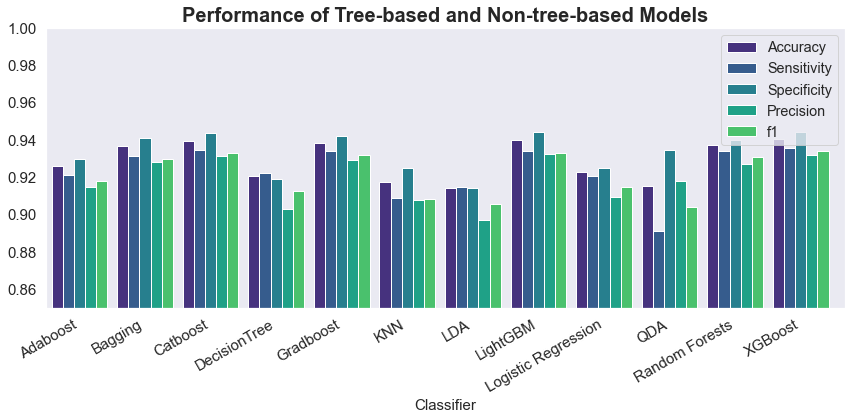

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

sns.set_theme(style="darkgrid")

mpl.rcParams['font.family'] = "Arial"

sns.set_palette('viridis')


# Sample data (replace this with your actual DataFrame)
data = empty_df

# Create a DataFrame from the sample data (replace 'data' with your actual DataFrame)
df = pd.DataFrame(data)

# Set the positions of the bars on the x-axis
x = np.arange(len(df))

# Plot the bars for each metric for each model
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.17
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'f1']
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, df[metric], width=bar_width, label=metric)

# Set plot properties
plt.xticks(x + 2 * bar_width, df['Model'], rotation=30, ha='right')
plt.legend(loc='upper right',fontsize='large')

plt.ylim(0.85,1)

# Set axes labels and title
ax.set_xlabel("Classifier", fontsize=15)
ax.set_title("Performance of Tree-based and Non-tree-based Models", fontsize=20, weight='bold')
plt.xlim(x[0] - bar_width, x[-1] + bar_width * (len(metrics) + 1))
plt.grid(False)

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

# Show the plot
plt.tight_layout()
plt.show()

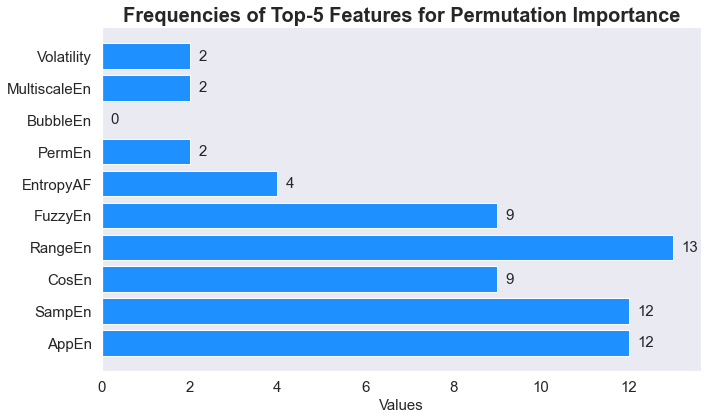

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
numbers_list = [12, 12, 9, 13, 9, 4, 2, 0, 2, 2]
labels = [
    'AppEn', 'SampEn', 'CosEn', 'RangeEn', 'FuzzyEn',
    'EntropyAF', 'PermEn', 'BubbleEn', 'MultiscaleEn', 'Volatility'
]

sns.set_theme(style="darkgrid")

# Create a DataFrame
data = {'Labels': labels, 'Values': numbers_list}
df = pd.DataFrame(data)

# Set the Arial font for all text elements
plt.rcParams['font.family'] = 'Arial'

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Labels'], df['Values'], color='dodgerblue')

# Set plot properties
plt.xlabel('Values', fontsize=15)
plt.title('Frequencies of Top-5 Features for Permutation Importance', fontsize=20, fontweight='bold')

# Add the values on top of the bars
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='left', va='center', fontsize=15)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)

# Set the tick label font size to 15
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


In [20]:
individual_lightgbm_df = pd.read_csv("new-individual-features/LightGBM.csv")
individual_catboost_df = pd.read_csv("new-individual-features/Catboost.csv")

In [21]:
individual_lightgbm_df

,Unnamed: 0,Mean Acc.,SD of Acc.,Total Acc.,Sensitivity,Specificity,Precision,f1
0,AppEn,0.879105,0.162251,0.867839,0.866007,0.869337,0.844178,0.854953
1,SampEn,0.879496,0.157006,0.870219,0.892608,0.851918,0.831284,0.860855
2,CosEn,0.878541,0.159536,0.869040,0.889493,0.852322,0.831177,0.859347
3,RangeEn,0.879287,0.096969,0.878692,0.901310,0.860203,0.840511,0.869849
4,FuzzyEn,0.770560,0.120493,0.771215,0.825612,0.726751,0.711795,0.764490
5,EntropyAF,0.860983,0.142201,0.862169,0.907985,0.824718,0.808951,0.855612
6,PermEn,0.619929,0.116403,0.628158,0.613300,0.640302,0.582238,0.597366
7,BubbleEn,0.617261,0.103016,0.620530,0.559308,0.670573,0.581205,0.570046
8,MultiscaleEn,0.853760,0.165901,0.845401,0.853894,0.838459,0.812056,0.832450
9,Volatility,0.784006,0.195085,0.784069,0.924005,0.669684,0.695730,0.793782


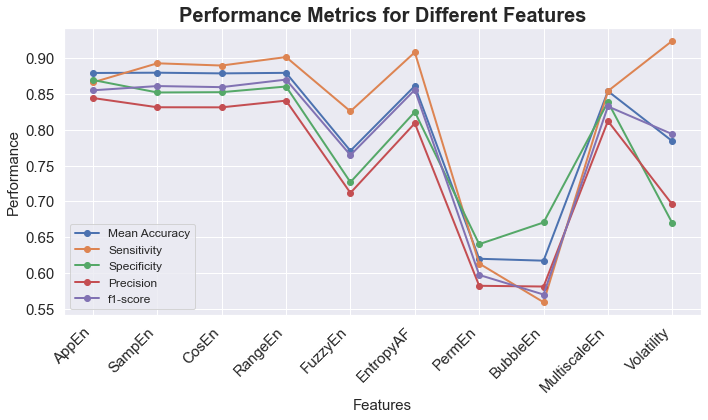

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

df = individual_lightgbm_df

sns.set_theme(style="darkgrid")


# Set the Arial font for all text elements
plt.rcParams['font.family'] = 'Arial'

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Unnamed: 0'], df['Mean Acc.'], marker='o', label='Mean Accuracy', linewidth=2)
plt.plot(df['Unnamed: 0'], df['Sensitivity'], marker='o', label='Sensitivity', linewidth=2)
plt.plot(df['Unnamed: 0'], df['Specificity'], marker='o', label='Specificity', linewidth=2)
plt.plot(df['Unnamed: 0'], df['Precision'], marker='o', label='Precision', linewidth=2)
plt.plot(df['Unnamed: 0'], df['f1'], marker='o', label='f1-score', linewidth=2)

# Set plot properties
plt.xlabel('Features', fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.title('Performance Metrics for Different Features', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

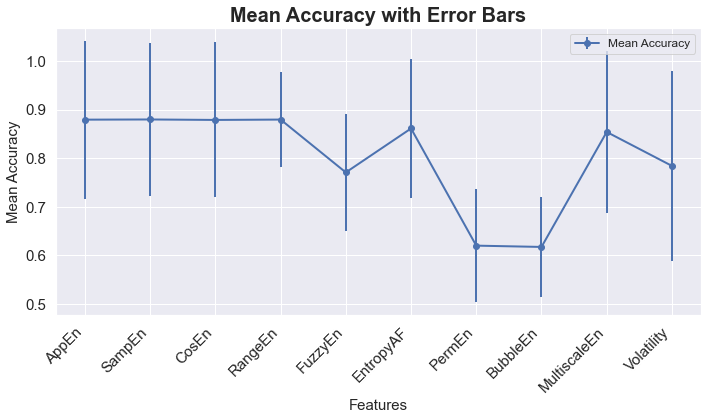

In [24]:
# Create the line plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(df['Unnamed: 0'], df['Mean Acc.'], yerr=df['SD of Acc.'], marker='o', label='Mean Accuracy', linewidth=2)

sns.set_theme(style="darkgrid")


# Set plot properties
plt.xlabel('Features', fontsize=15)
plt.ylabel('Mean Accuracy', fontsize=15)
plt.title('Mean Accuracy with Error Bars', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


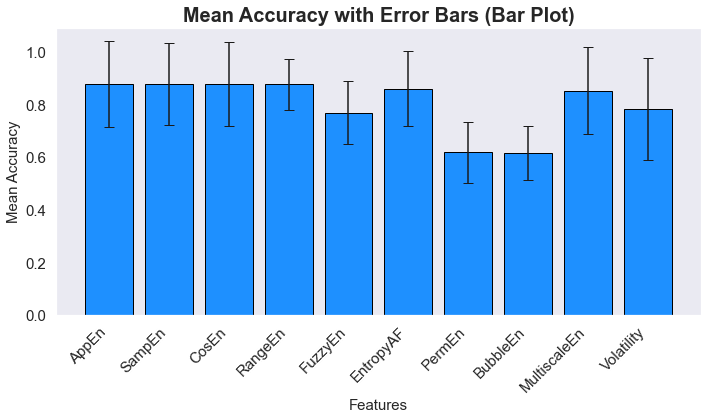

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="dark")


# Sample data
data = {
    'Unnamed: 0': ['AppEn', 'SampEn', 'CosEn', 'RangeEn', 'FuzzyEn', 'EntropyAF', 'PermEn', 'BubbleEn', 'MultiscaleEn', 'Volatility'],
    'Mean Acc.': [0.879105, 0.879496, 0.878541, 0.879287, 0.770560, 0.860983, 0.619929, 0.617261, 0.853760, 0.784006],
    'SD of Acc.': [0.162251, 0.157006, 0.159536, 0.096969, 0.120493, 0.142201, 0.116403, 0.103016, 0.165901, 0.195085],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Set the Arial font for all text elements
plt.rcParams['font.family'] = 'Arial'

# Create the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(df['Unnamed: 0'], df['Mean Acc.'], yerr=df['SD of Acc.'], capsize=5, color='dodgerblue', edgecolor='black', linewidth=1)

# Set plot properties
plt.xlabel('Features', fontsize=15)
plt.ylabel('Mean Accuracy', fontsize=15)
plt.title('Mean Accuracy with Error Bars (Bar Plot)', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()
